In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
path ='C:/ASM/DevData/eating/eating_detection/outputs/bite_detection_validation_4_conv_layer/minbiteinterval_32_varth_025_windowsize_96_xth_-03/{}/results'

test_pred_mid = np.genfromtxt(path.format("mid")+'/test_prediction.csv', delimiter=',')
test_pred_left = np.genfromtxt(path.format("left")+'/test_prediction.csv', delimiter=',')
test_pred_right = np.genfromtxt(path.format("right")+'/test_prediction.csv', delimiter=',')

y = np.genfromtxt(path.format("mid")+'/test_y.csv', delimiter=',')
y = (y[:, 0]==0).astype(int)

In [118]:
print(test_pred_mid.shape, test_pred_left.shape, test_pred_right.shape, test_y.shape)

pred = (test_pred_mid + test_pred_left + test_pred_right)/3
#pred = test_pred_left
pred = (pred[:, 0]<0.5).astype(int)
print(np.sum(y==1), len(y))
print(np.sum(pred), len(pred))

#tn = np.sum(y)

(3660, 3) (3660, 3) (3660, 3) (3660, 3)
865 3660
655 3660


In [119]:
tn = np.sum((y==0) & (pred==0))
tp = np.sum((y==1) & (pred==1))
fn = np.sum((y==1) & (pred==0))
fp = np.sum((y==0) & (pred==1))

acc = (tp+tn)/(tn+tp+fn+fp)
pr = tp/(tp+fp) if tp+fp>0 else 0           
rc = tp/(tp+fn) if tp+fn>0 else 0                   
sp = tn/(tn+fp) if tn+fp>0 else 0        
f1 = 2*pr*rc/(pr + rc) if pr + rc>0 else 0 

print("Accuracy: ", acc)
print("Precision: ", pr)
print("Recall: ", rc)
print("Specificity: ", sp)
print("F1 score: ", f1)

Accuracy:  0.8863387978142077
Precision:  0.8427480916030534
Recall:  0.638150289017341
Specificity:  0.9631484794275492
F1 score:  0.7263157894736841


In [107]:
train_result = np.genfromtxt(path.format("mid")+'/train_result.csv', delimiter=',')
test_result = np.genfromtxt(path.format("mid")+'/test_result.csv', delimiter=',')
#test_pred_right = np.genfromtxt(path.format("right")+'/test_prediction.csv', delimiter=',')

y = np.genfromtxt(path.format("mid")+'/test_y.csv', delimiter=',')
y = (y[:, 0]==0).astype(int)

In [99]:
def smooth(d, factor):
    res = np.zeros(d.shape)    
    res[0, :] = d[0, :]
    for i in range(1, len(d)):
        res[i, 0] = d[i, 0]
        res[i, 1:] = factor*d[i-1, 1:] + (1-factor)*d[i, 1:]
    
    return res

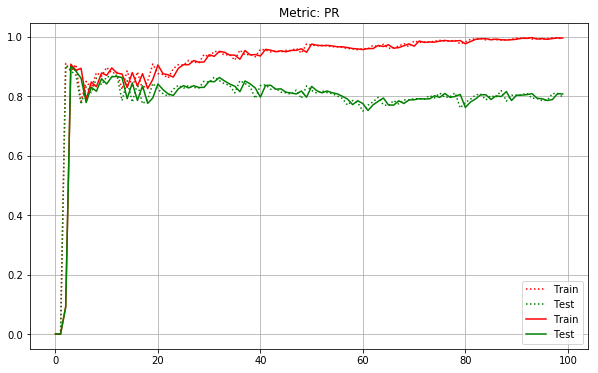

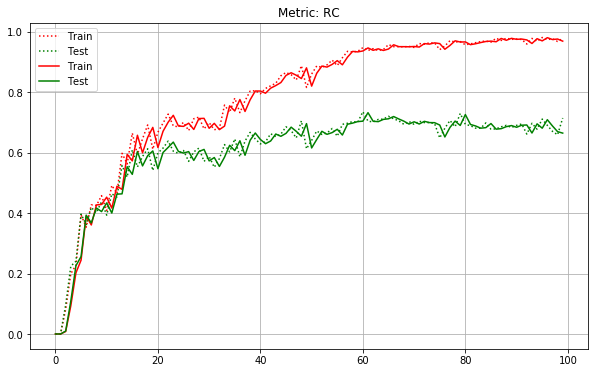

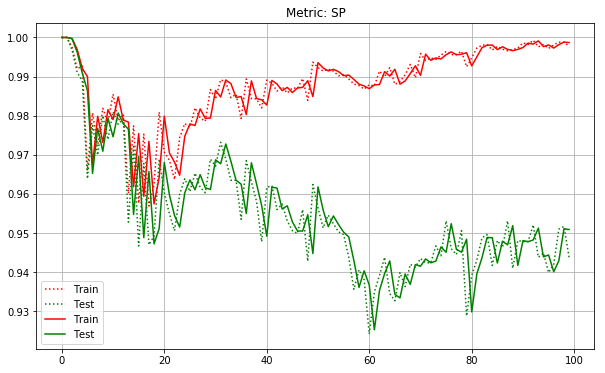

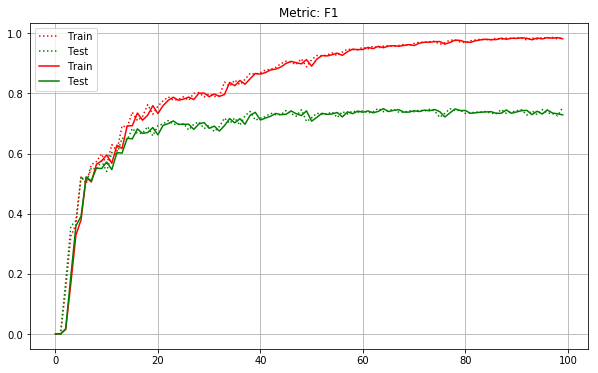

In [100]:
factor = 0.9
train_smooth = smooth(train_result, factor)
test_smooth = smooth(test_result, factor)

col_names = ['epoch','Loss', "Acc", 'TN', "TP", "FN", "FP", "PR", "RC", "SP", "F1"]

for i in range(1, 11):
    if i<=6:
        continue
    fig = plt.figure(figsize=(10, 6))
    subplot = fig.add_subplot(111)        
    d1 = train_result
    d2 = test_result
    d3 = train_smooth
    d4 = test_smooth

    subplot.plot(d1[:, 0], d1[:, i], label='Train', linestyle=':', color='red')
    subplot.plot(d2[:, 0], d2[:, i], label='Test', linestyle=':', color='green')
    subplot.plot(d1[:, 0], d3[:, i], label='Train', color='red')
    subplot.plot(d2[:, 0], d4[:, i], label='Test', color='green')

    subplot.legend()           
    plt.title("Metric: "+col_names[i])
    plt.grid(True)
    plt.show()                        
